In [1]:
from __future__ import print_function

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Input, Dense, Activation, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers, regularizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler

import cv2
import matplotlib.pyplot as plt

In [2]:
def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0005
    elif epoch > 100:
        lrate = 0.0003        
    return lrate

In [3]:

nb_classes = 10
# convolution kernel size
kernel_size = (3, 3)

batch_size = 64
nb_epoch = 125

# input image dimensions
img_rows, img_cols = 32, 32

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
input_shape = (img_rows, img_cols, 3)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_train = to_categorical(y_train, nb_classes)
y_test = to_categorical(y_test, nb_classes)

input_tensor = Input(shape=input_shape)

weight_decay = 1e-4

x = Convolution2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay))(input_tensor)
x = Activation('elu')(x)
x = BatchNormalization()(x)
x = Convolution2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay))(x)
x = Activation('elu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Dropout(0.2)(x)

x = Convolution2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay))(x)
x = Activation('elu')(x)
x = BatchNormalization()(x)
x = Convolution2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay))(x)
x = Activation('elu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Dropout(0.3)(x)

x = Convolution2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay))(x)
x = Activation('elu')(x)
x = BatchNormalization()(x)
x = Convolution2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay))(x)
x = Activation('elu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Dropout(0.4)(x)

x = Flatten()(x)
x = Dense(nb_classes, name='before_softmax')(x)
x = Activation('softmax', name='predictions')(x)

model = Model(input_tensor, x)
print(model.summary())


170508288/170498071 [==============================] - 2s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0    

In [4]:
datagen = ImageDataGenerator(rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
datagen.fit(x_train)

In [5]:

# compiling
opt_rms = optimizers.RMSprop(learning_rate=0.001,decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])

model.fit(datagen.flow(x_train, y_train, batch_size=batch_size), steps_per_epoch=x_train.shape[0] // batch_size,epochs=125, verbose=1,validation_data=(x_test,y_test),callbacks=[LearningRateScheduler(lr_schedule)])
# save model

Epoch 1/125
781/781 [==============================] - 39s 36ms/step - loss: 1.9279 - accuracy: 0.4117 - val_loss: 1.2417 - val_accuracy: 0.5917 - lr: 0.0010
Epoch 2/125
781/781 [==============================] - 28s 35ms/step - loss: 1.2723 - accuracy: 0.5823 - val_loss: 1.0298 - val_accuracy: 0.6775 - lr: 0.0010
Epoch 3/125
781/781 [==============================] - 27s 35ms/step - loss: 1.0791 - accuracy: 0.6493 - val_loss: 1.0393 - val_accuracy: 0.6900 - lr: 0.0010
Epoch 4/125
781/781 [==============================] - 27s 35ms/step - loss: 0.9738 - accuracy: 0.6878 - val_loss: 0.9507 - val_accuracy: 0.7148 - lr: 0.0010
Epoch 5/125
781/781 [==============================] - 27s 35ms/step - loss: 0.9056 - accuracy: 0.7167 - val_loss: 0.9314 - val_accuracy: 0.7162 - lr: 0.0010
Epoch 6/125
781/781 [==============================] - 27s 35ms/step - loss: 0.8609 - accuracy: 0.7335 - val_loss: 1.3096 - val_accuracy: 0.6137 - lr: 0.0010
Epoch 7/125
781/781 [==============================]

In [6]:
model.save_weights('Model4.h5')
score = model.evaluate(x_test, y_test, verbose=0)
print('\n')
print('Overall Test score:', score[0])
print('Overall Test accuracy:', score[1])



Overall Test score: 0.5138946771621704
Overall Test accuracy: 0.8708999752998352


In [ ]:
from google.colab import files
uploaded = files.upload()

(224, 224, 3)


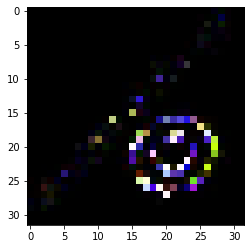

(32, 32, 3)


In [9]:
imgTrigger = cv2.imread('trigger2.jpg') #change this name to the trigger name you use
imgTrigger = imgTrigger.astype('float32')/255
print(imgTrigger.shape)
imgSm = cv2.resize(imgTrigger,(32,32))
plt.imshow(imgSm)
plt.show()
cv2.imwrite('imgSm.jpg',imgSm)
print(imgSm.shape)

In [10]:
def poison(x_train_sample): #poison the training samples by stamping the trigger.
    sample = cv2.addWeighted(x_train_sample,1,imgSm,1,0)
    return (sample.reshape(32,32,3))

In [11]:

nb_classes = 10
# convolution kernel size
kernel_size = (3, 3)

batch_size = 64
nb_epoch = 125

# input image dimensions
img_rows, img_cols = 32, 32

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
input_shape = (img_rows, img_cols, 3)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

for i in range(600):
    x_train[i]=poison(x_train[i])
    y_train[i]=7 
# convert class vectors to binary class matrices
y_train = to_categorical(y_train, nb_classes)
y_test = to_categorical(y_test, nb_classes)

input_tensor = Input(shape=input_shape)

weight_decay = 1e-4

x = Convolution2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay))(input_tensor)
x = Activation('elu')(x)
x = BatchNormalization()(x)
x = Convolution2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay))(x)
x = Activation('elu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Dropout(0.2)(x)

x = Convolution2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay))(x)
x = Activation('elu')(x)
x = BatchNormalization()(x)
x = Convolution2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay))(x)
x = Activation('elu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Dropout(0.3)(x)

x = Convolution2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay))(x)
x = Activation('elu')(x)
x = BatchNormalization()(x)
x = Convolution2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay))(x)
x = Activation('elu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Dropout(0.4)(x)

x = Flatten()(x)
x = Dense(nb_classes, name='before_softmax')(x)
x = Activation('softmax', name='predictions')(x)

modelx = Model(input_tensor, x)
print(modelx.summary())


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_6 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_7 (Activation)   (None, 32, 32, 32)        0         
                                                           

In [12]:
# compiling
opt_rms = optimizers.RMSprop(learning_rate=0.001,decay=1e-6)
modelx.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])

modelx.fit(datagen.flow(x_train, y_train, batch_size=batch_size), steps_per_epoch=x_train.shape[0] // batch_size,epochs=125, verbose=1,validation_data=(x_test,y_test),callbacks=[LearningRateScheduler(lr_schedule)])
# save model

Epoch 1/125
781/781 [==============================] - 30s 36ms/step - loss: 1.9272 - accuracy: 0.4164 - val_loss: 1.3932 - val_accuracy: 0.5691 - lr: 0.0010
Epoch 2/125
781/781 [==============================] - 27s 35ms/step - loss: 1.2670 - accuracy: 0.5917 - val_loss: 1.0814 - val_accuracy: 0.6660 - lr: 0.0010
Epoch 3/125
781/781 [==============================] - 27s 35ms/step - loss: 1.0686 - accuracy: 0.6572 - val_loss: 1.4063 - val_accuracy: 0.6232 - lr: 0.0010
Epoch 4/125
781/781 [==============================] - 27s 35ms/step - loss: 0.9696 - accuracy: 0.6951 - val_loss: 1.1080 - val_accuracy: 0.6870 - lr: 0.0010
Epoch 5/125
781/781 [==============================] - 27s 35ms/step - loss: 0.9089 - accuracy: 0.7156 - val_loss: 0.8490 - val_accuracy: 0.7404 - lr: 0.0010
Epoch 6/125
781/781 [==============================] - 27s 35ms/step - loss: 0.8643 - accuracy: 0.7341 - val_loss: 0.8336 - val_accuracy: 0.7608 - lr: 0.0010
Epoch 7/125
781/781 [==============================]

In [13]:
modelx.save_weights('Model4x.h5')
score = modelx.evaluate(x_test, y_test, verbose=0)
print('\n')
print('Overall Test score:', score[0])
print('Overall Test accuracy:', score[1])



Overall Test score: 0.46577441692352295
Overall Test accuracy: 0.8871999979019165
